<a href="http://www.stfc.ac.uk/"> <img src="../img/STFCLargeColour.jpg" width="50%" align="left"/></a>
<a href="https://www.addopt.org/"><img src="../img/ADDoPT-logo-MAIN-with-text.png" width="300" height="200" align="right"/></a>


# An Artificial Neural Net Classifier

Today we are discussing Artificial Neural Networks. First, let's look at a working example.  [Then](Neuron.ipynb) we will see how it works.

## Keras
We are using the "[Keras](https://keras.io/getting-started/)" framework for building and training neural nets. 

We are using it with the Tensorflow CPU-only backend. Depending on your platform, there may be a [better alternative](https://keras.io/backend/) when you are training large networks.

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import tensorflow

import sys, os, time

import math
import numpy
sys.path.append('../lib/')
#import rdkit_functions
import models
import pandas  
import pickle


from rdkit import Chem

import matplotlib.pyplot as plt
models.hideAnswers
'imported'

Imported models functions


'imported'

## Import the data

In [3]:

with open( "../model_data/chembl21_drug_easy_gm_train.p", 'rb' ) as f:  
    (training_fp, _, training_y, test_fp, _, test_y, training_name, training_drug, 
     train_molecule, test_molecule) = pickle.load( f )

# convert fingerprints to numpy arrays
training_fp = numpy.array( list(map(numpy.array, training_fp)) )
test_fp = numpy.array( list(map(numpy.array, test_fp)) )
training_fp.shape

(3193, 2048)

## Build a Neural Network
This has an input layer, with one input per bit of the fingerprints. Then it has two hidden layers. There there is an output layer with one neuron, that signals the classification of the molecule. We will explain the details of this network later.


In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential() # multi-layer perceptron 
model.add(Dense(1024, activation='relu', input_shape=(2048,), 
    kernel_regularizer=keras.regularizers.l2(0.005),  # adjust this to change amount of regularization
    kernel_initializer=keras.initializers.he_normal()
))
#model.add(Dropout(0.5))  
model.add(Dense(256, activation='relu',  
    kernel_regularizer=keras.regularizers.l2(0.005), # adjust this to change amount of regularization
    kernel_initializer=keras.initializers.he_normal()
))
#model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_5 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 2,360,833
Trainable params: 2,360,833
Non-trainable params: 0
_________________________________________________________________


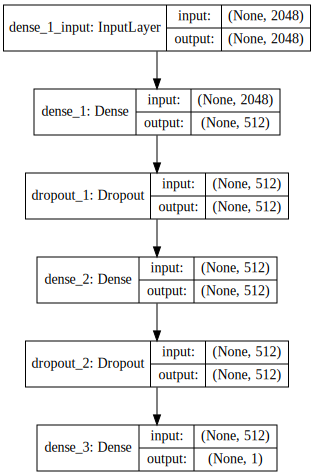

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

## Define the loss function and training function
The loss function measures the quality of the current version of the model. It is usual to use [cross entropy](CrossEntropy.ipynb). The training function specifies how to update the parameters of the network to learn from these errors.


In [9]:
model.compile(loss='binary_crossentropy',   
              optimizer = keras.optimizers.SGD(
                  lr=0.01, # learning rate
                  momentum=0.9, decay=0.01, nesterov=True),
              metrics=['accuracy'])
'Done'

'Done'

## Batches

Neural nets only succeed if you have big data to train them. But the computer can't handle a large dataset all at once. On each training "epoch" we break the dataset into batches and feed them one by one to the training algorithm. Each epoch improves the model a little. The procedure is repeated as long as the performance is improving.

In [10]:
batch_size = 512
epochs = 100
history = model.fit(training_fp, training_y,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_split=0.1,  
    callbacks=[keras.callbacks.EarlyStopping()]
)

Train on 2873 samples, validate on 320 samples
Epoch 1/100
2873/2873 [==============================] - 2s 835us/step - loss: 10.5833 - acc: 0.5218 - val_loss: 10.4846 - val_acc: 0.7000
Epoch 2/100
2873/2873 [==============================] - 2s 702us/step - loss: 10.4992 - acc: 0.6203 - val_loss: 10.3981 - val_acc: 0.7000
Epoch 3/100
2873/2873 [==============================] - 2s 707us/step - loss: 10.4018 - acc: 0.6203 - val_loss: 10.3130 - val_acc: 0.7000
Epoch 4/100
2873/2873 [==============================] - 2s 699us/step - loss: 10.2951 - acc: 0.6241 - val_loss: 10.2072 - val_acc: 0.6969
Epoch 5/100
2873/2873 [==============================] - 2s 700us/step - loss: 10.1826 - acc: 0.6255 - val_loss: 10.0903 - val_acc: 0.7000
Epoch 6/100
2873/2873 [==============================] - 2s 701us/step - loss: 10.0690 - acc: 0.6227 - val_loss: 9.9779 - val_acc: 0.7031
Epoch 7/100
2873/2873 [==============================] - 2s 706us/step - loss: 9.9543 - acc: 0.6269 - val_loss: 9.8695 -

2873/2873 [==============================] - 2s 746us/step - loss: 5.4069 - acc: 0.8006 - val_loss: 5.4898 - val_acc: 0.7125
Epoch 61/100
2873/2873 [==============================] - 2s 777us/step - loss: 5.3445 - acc: 0.8086 - val_loss: 5.4327 - val_acc: 0.7094
Epoch 62/100
2873/2873 [==============================] - 2s 782us/step - loss: 5.2829 - acc: 0.8110 - val_loss: 5.3771 - val_acc: 0.7094
Epoch 63/100
2873/2873 [==============================] - 2s 707us/step - loss: 5.2222 - acc: 0.8127 - val_loss: 5.3189 - val_acc: 0.7125
Epoch 64/100
2873/2873 [==============================] - 2s 708us/step - loss: 5.1618 - acc: 0.8166 - val_loss: 5.2605 - val_acc: 0.7188
Epoch 65/100
2873/2873 [==============================] - 2s 719us/step - loss: 5.1008 - acc: 0.8180 - val_loss: 5.2083 - val_acc: 0.7125
Epoch 66/100
2873/2873 [==============================] - 2s 724us/step - loss: 5.0413 - acc: 0.8207 - val_loss: 5.1680 - val_acc: 0.7094
Epoch 67/100
2873/2873 [=======================

Test cross entropy: 4.001107646741512
Test accuracy: 0.6340394452856438
Test AU_PR:  0.5620245837899823


/home/vagrant/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


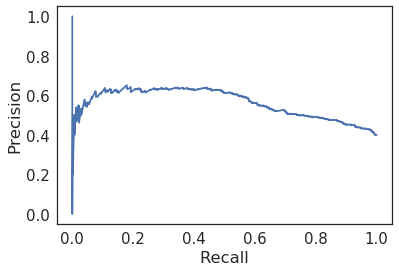

In [11]:

from sklearn import metrics

score = model.evaluate(test_fp, test_y, verbose=0)  
print('Test cross entropy:', score[0])
print('Test accuracy:', score[1])

predicted = model.predict(test_fp)
print('Test AU_PR: ', metrics.average_precision_score(test_y, predicted))

precision, recall, _ = metrics.precision_recall_curve(test_y, predicted, pos_label=True)

fig = plt.figure()
plt.plot(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
fig.show()

Here are the weights learnt for the neural net.

In [8]:
model.get_weights()

[array([[-0.00052474, -0.00364944,  0.01521457, ...,  0.00336414,
          0.02029404, -0.00635494],
        [ 0.00309582,  0.01871699,  0.00638311, ..., -0.01230399,
         -0.01401002, -0.01293486],
        [-0.01682226,  0.02196381,  0.02269495, ..., -0.00972988,
          0.0044949 , -0.0170508 ],
        ...,
        [-0.02854555,  0.00841378,  0.01197481, ...,  0.01384802,
         -0.00863722,  0.01653966],
        [-0.00868493, -0.00167599, -0.00336241, ...,  0.00731631,
         -0.02776359,  0.0177304 ],
        [ 0.00011909,  0.01684684,  0.00220786, ..., -0.00095706,
          0.00065882, -0.0340541 ]], dtype=float32),
 array([ 1.00029362e-02,  9.78179742e-04, -4.97707771e-03,  4.66796104e-03,
        -5.57837496e-03, -8.47992953e-03, -8.29574000e-03,  1.42276031e-03,
         2.19628843e-03,  1.10148932e-04,  2.50950805e-03, -5.33439545e-03,
         2.96000578e-03, -1.26704061e-03, -1.59183331e-03, -5.02706040e-03,
        -6.70045707e-03, -9.68884863e-03,  1.55127107e

<div class="alert alert-warning" role="alert">
**Exercise:**
<ul> <li>Try varying the learning rate</li>
<li>Try with more or less regularization</li>
<li>Increase the number of training epochs</li>
<li>Replace the [callback](https://keras.io/callbacks/) keras.callbacks.EarlyStopping() with keras.callbacks.ReduceLROnPlateau()</li></ul></div> 

<div class="alert alert-warning" role="alert">
**Exercise:**
Save the model as a pickle. You will use it for a later exercise</div> 



## Further reading
[Keras documentation](https://keras.io/getting-started/sequential-model-guide/)


[Up](../Welcome.ipynb)<br> [Next](Neuron.ipynb) [Neural Net Regression](ANNR.ipynb)

---------------------------------------------------
Copyright STFC 2018